## Allen helper example

In [1]:
import sys
sys.path.append('..')

from allen_functions import AllenHelper

In [2]:
helper = AllenHelper(atlas_id=3, downsample=3)

In [3]:
AllenHelper?

Init signature: AllenHelper(atlas_id: int = 3, downsample: int = 3)
Docstring:      <no docstring>
Init docstring:
atlas ids:
* 3 = 21 pcw cerebrum [default]
* 287730656 = 21 pcw brainstem
* 138322603 = 15 pcw

mpp = 2^downsample
downsample=3 [default] => mpp=8
File:           c:\users\keerthi\code\hbp\sgbc_dharani_data_tutorial\dharani_data_tutorial\allen_functions.py
Type:           type
Subclasses:     

In [4]:
len(helper.get_section_numbers())

169

In [5]:
im_arr = helper.get_sectionimage(357)

In [6]:
im_arr.shape

(4756, 2452, 3)

In [78]:
helper.get_section_urls(357)

('http://api.brain-map.org/api/v2/atlas_image_download/101892528?downsample=3&annotation=false&atlas=3',
 'http://api.brain-map.org/api/v2/svg/101892528?downsample=3&groups=31')

In [7]:
helper.get_viewer_url(357)

'https://atlas.brain-map.org/atlas?atlas=3&plate=101892528&zoom=-5'

In [8]:
annot357 = helper.get_annotation(357)

### Allen ontology helper

In [9]:
from ontology_handling import TreeHelper
ontohelper_allen = TreeHelper('allen_devhuman')

In [10]:
TreeHelper?

Init signature: TreeHelper(ontoname='dharani')
Docstring:      Abstracts ontology tree reading, searching and navigation for Dharani and Allen nomenclature
Init docstring: ontoname: ['dharani', 'allen_devhuman'] 
File:           c:\users\keerthi\code\hbp\sgbc_dharani_data_tutorial\dharani_data_tutorial\ontology_handling.py
Type:           type
Subclasses:     

In [11]:
len(ontohelper_allen)

3315

In [12]:
ontohelper_allen.print_tree()

[lvl] id (acronym) name
---------------------
 [0] 10155 (Br) brain
   [1] 10156 (F) forebrain (prosencephalon)
     [2] 10157 (FGM) gray matter of forebrain
       [3] 10506 (FTS) transient structures of forebrain
         [4] 11580 (SG) subpial granular zone
           [5] 11581 (fSG) SG in frontal neocortex
             [6] 11587 (fSGfp) SG in frontal polar cortex
             [6] 11582 (fSGdm) SG in dorsomedial frontal cortex
             [6] 11585 (fSGdl) SG in dorsolateral prefrontal cortex
             [6] 11586 (fSGvl) SG in ventrolateral prefrontal cortex
             [6] 11583 (fSGor) SG in orbital frontal cortex
             [6] 11584 (fSGm1) SG in posterior frontal cortex (motor cortex)
           [5] 11593 (pSG) SG in parietal neocortex
             [6] 11594 (pSGs1) SG in primary somatosensory cortex
             [6] 11597 (pSGdm) SG in dorsomedial parietal cortex (area 7m)
             [6] 11595 (pSGpd) SG in posterosuperior (dorsal) parietal cortex
             [6] 1159

### display annotations

In [13]:
from nb_functions import display_annotation, display_annotation_tree

function `display_annotation` shows the available regions in `annot` as a tab-indented list with color legend

There are two plots in the end, the left shows the image, and the right shows all the annotations (by default)

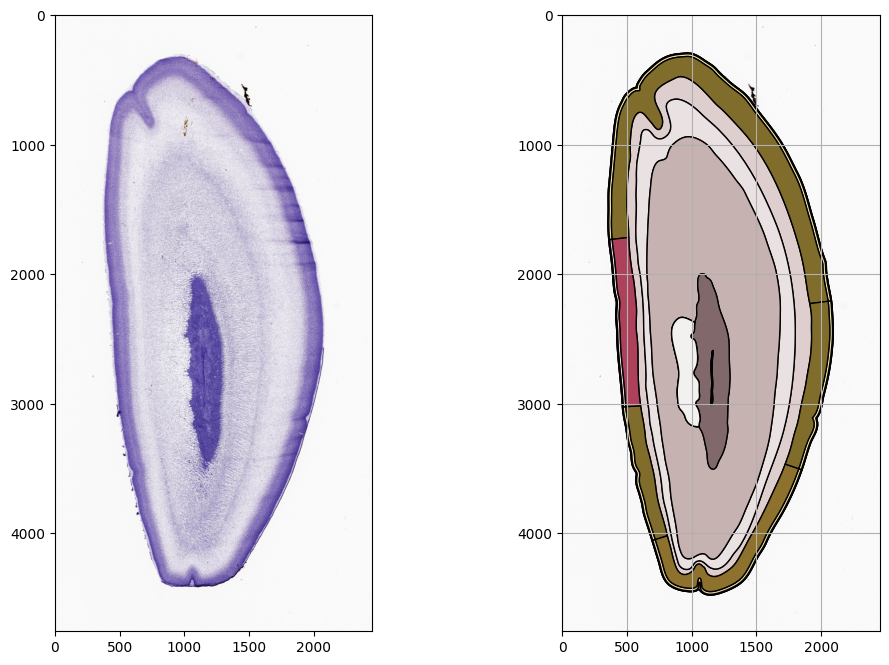

In [15]:
displayedids,superannot=display_annotation(im_arr, annot357, ontohelper_allen)

The return value `displayedids` has a list of ontology ids that were displayed in the second plot. The return value `superannot` is a dictionary of inferred annotations (by default, there was no request for inferences, and so should be empty)

We see that various levels in the ontology are annotated, with overlapping annotations

a filter for ``selectedlev`` is provided in the display function. 

### exercise 1

Lets pass `selectedlev` = 3

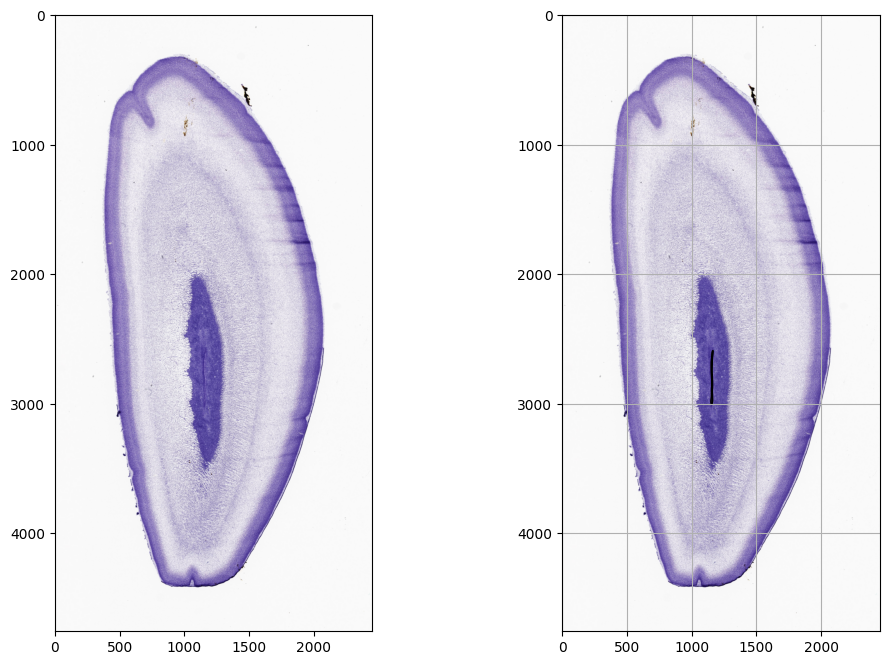

In [19]:
displayedids, superannot = display_annotation(im_arr,annot357, ontohelper_allen, selectedlev=3)

In [20]:
displayedids

[10596]

In [21]:
superannot

{}

although more ids are printed, only one (explicitly annotated) got displayed. Also, no inferences yet.

The function can also take a list `ontoids` which will infer the supershapes from `annot` and display as a third image

### exercise 2

sending a single value in ontoids

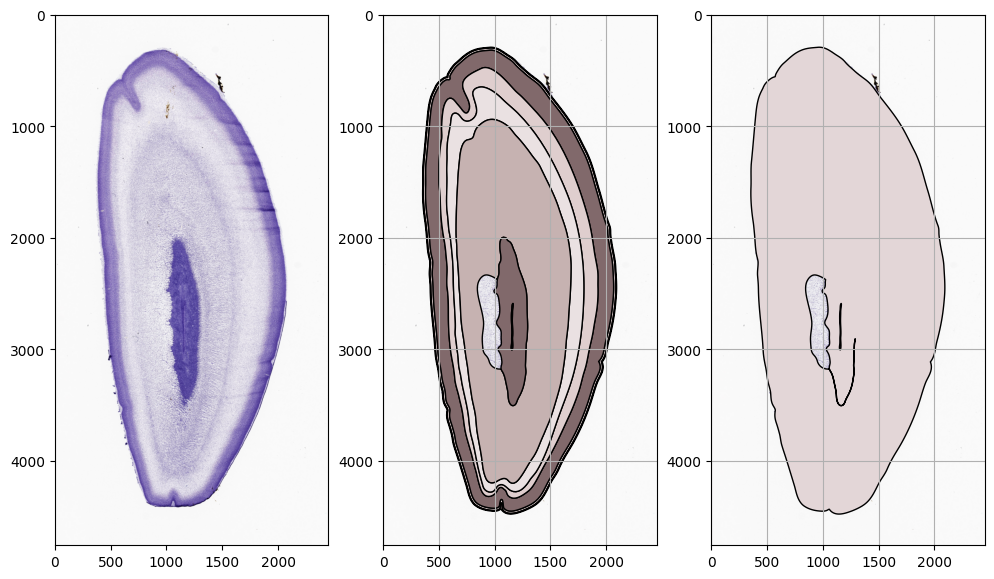

In [24]:
displayedids,superannot = display_annotation(im_arr,annot357, ontohelper_allen, selectedlev=3, ontoids=[10506])

In [25]:
displayedids

[10508, 10515, 10522, 10529, 10536, 10542, 10596, 11580]

In [26]:
superannot

{10506: <POLYGON ((2083.542 2241.096, 2083.493 2240.582, 2083.368 2239.016, 2082.841...>}

The id `10506` was inferred, by taking its 7 children that were annotated. This is seen in the indication (+7) in the tree listing.

The color used for the inferred region is as per the ontology

### exercise 3

A deeper level, without any ontoids (similar to exercise 1)

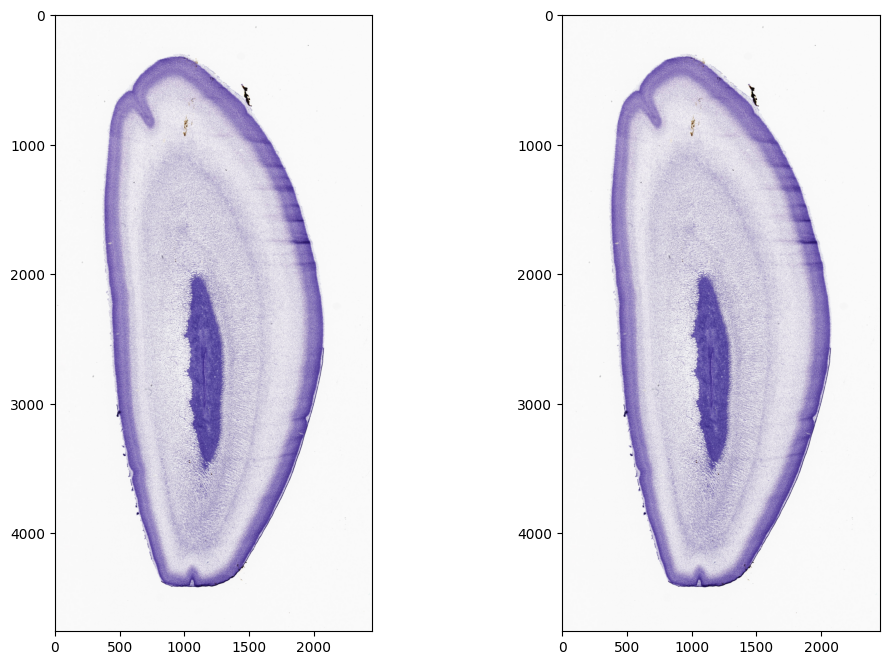

In [27]:
displayedids, superannot = display_annotation(im_arr,annot357, ontohelper_allen, selectedlev=5)

In [28]:
displayedids

[]

In [29]:
superannot

{}

Nothing was displayed, though the tree listing showed some inferrable parents (prefixed with (+NNN))

### exercise 4

Specifying some of the parents, to request them to be inferred and displayed. The tree display should expand at the requested ids, and the third column of plot should reflect the request

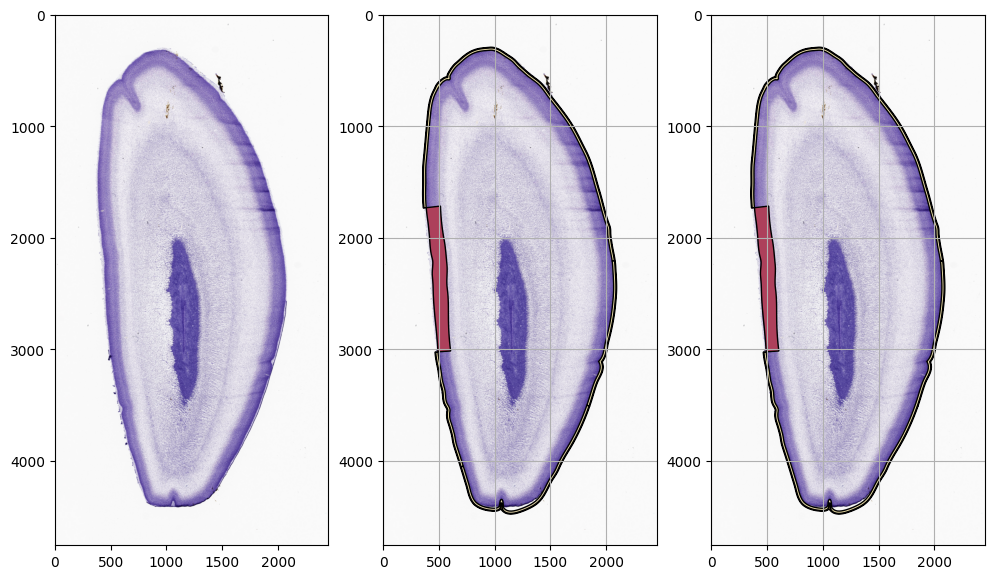

In [37]:
displayedids, superannot = display_annotation(im_arr,annot357, ontohelper_allen, selectedlev=5, ontoids=[ 11581, 11715, 10509])

In [38]:
displayedids

[11583, 11585, 11586, 11587, 11608, 11610, 11611, 11612, 11716]

In [39]:
superannot

{11581: <MULTIPOLYGON (((2087.624 2310.22, 2087.624 2310.211, 2087.623 2310.203, 208...>,
 11715: <POLYGON ((412.478 1956.716, 414.399 1977.809, 416.009 1998.942, 417.456 202...>,
 10509: <MULTIPOLYGON (((2080.924 2298.781, 2080.569 2292.823, 2080.217 2286.839, 20...>}

# Calling the intermediate level functions 

In [22]:
from annotation_handling import get_supershape

In [23]:
shp,chlist=get_supershape(10156, annot357, ontohelper_allen)

In [25]:
shp.interiors[0].length

7071.4351070347875

In [26]:
7000/12

583.3333333333334

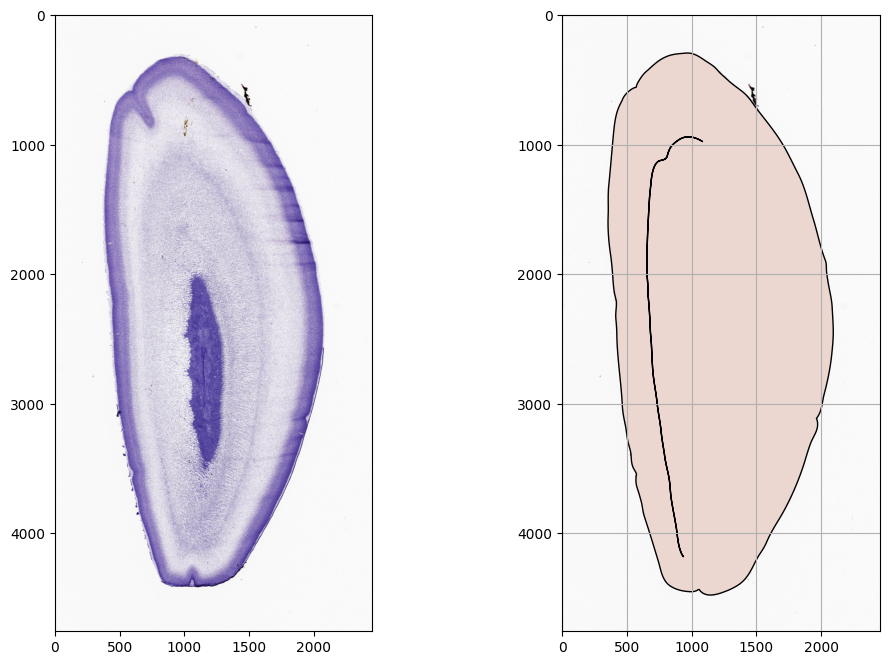

In [24]:
from nb_functions import display_shape
shpcolor=ontohelper_allen.onto_lookup[10156].color_hex_triplet
display_shape(im_arr, shp, shpcolor)

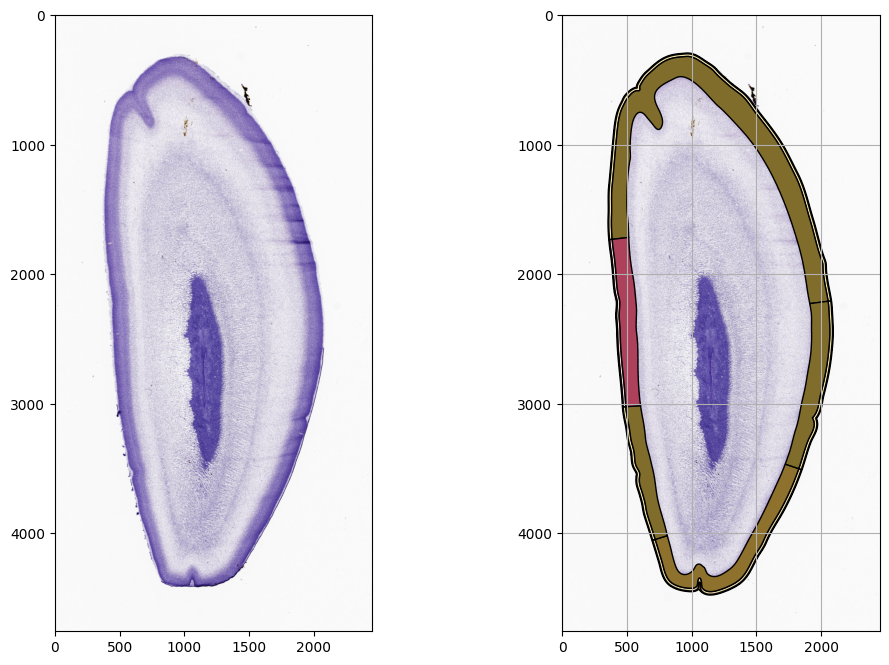

In [15]:
displayedids=display_annotation(im_arr, annot357, ontohelper_allen, selectedlev=6)

## find superstructures

In [16]:
from annotation_handling import find_superids

superids = find_superids(annot357,ontohelper_allen)

In [17]:
superids

defaultdict(list,
            {10155: [10595,
              10596,
              10557,
              10561,
              11580,
              12967,
              11587,
              11586,
              11585,
              11583,
              10542,
              10536,
              10529,
              10522,
              10515,
              11716,
              11664,
              11661,
              11658,
              11652,
              10508,
              11630,
              11612,
              11611,
              11610,
              11608],
             10595: [10596],
             10557: [10561],
             11580: [12967, 11587, 11586, 11585, 11583],
             10515: [11716, 11664, 11661, 11658, 11652],
             10508: [11630, 11612, 11611, 11610, 11608]})

In [30]:
annot357[10596]==annot357[10595]

True

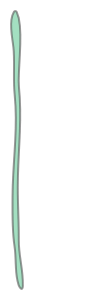

In [31]:
annot357[10596]

In [35]:
ontohelper_allen.onto_lookup[10596]

NodeRecord(acronym='LV', name='lateral ventricles', level=3, parentid=10595, color_hex_triplet='#231F20')

## Searchable tree display (jstree)

Shows the Allen ontology as an embedded jstree (https://www.jstree.com/) with a search box

In [40]:
from nb_functions import show_jstree

Note: if the below cell does not show two elements (brain, spinal cord), restart the notebook and retry

In [42]:
show_jstree(ontohelper_allen)

Search using the ontohelper function

In [44]:
ontohelper_allen.search('gray matter of forebrain')

[('gray matter of forebrain', 100.0, 10157)]

In [45]:
ontohelper_allen.onto_lookup[10294]

NodeRecord(acronym='HIP', name='hippocampus (hippocampal formation)', color_hex_triplet='#BFB5D5', level=7, parentid=10293, numchildren=3)

In [46]:
ontohelper_allen.onto_lookup[10331]

NodeRecord(acronym='CN', name='cerebral nuclei', color_hex_triplet='#D7E9C3', level=4, parentid=10158, numchildren=6)

In [47]:
ontohelper_allen.onto_lookup[10506]

NodeRecord(acronym='FTS', name='transient structures of forebrain', color_hex_triplet='#E3D6D7', level=3, parentid=10157, numchildren=16)

In [49]:
ontohelper_allen.onto_lookup[10467]

NodeRecord(acronym='HTH', name='hypothalamus', color_hex_triplet='#E4C9D9', level=4, parentid=10389, numchildren=5)

In [50]:
ontohelper_allen.onto_lookup[10390]

NodeRecord(acronym='THM', name='thalamus', color_hex_triplet='#E4CCE3', level=4, parentid=10389, numchildren=4)

In [51]:
ontohelper_allen.onto_lookup[10648]

NodeRecord(acronym='M', name='midbrain (mesencephalon)', color_hex_triplet='#AFD0DD', level=1, parentid=10155, numchildren=5)

In [52]:
ontohelper_allen.onto_lookup[10653]

NodeRecord(acronym='H', name='hindbrain (rhombencephalon)', color_hex_triplet='#CAD7EE', level=1, parentid=10155, numchildren=5)

In [53]:
ontohelper_allen.onto_lookup[10656]

NodeRecord(acronym='CB', name='cerebellum', color_hex_triplet='#9EBAE1', level=4, parentid=10655, numchildren=2)

In [54]:
ontohelper_allen.onto_lookup[10557]

NodeRecord(acronym='FWM', name='white matter of forebrain', color_hex_triplet='#F2F1F0', level=2, parentid=10156, numchildren=2)

In [55]:
ontohelper_allen.onto_lookup[10595]

NodeRecord(acronym='FV', name='ventricles of forebrain', color_hex_triplet='#231F20', level=2, parentid=10156, numchildren=4)

In [56]:
ontohelper_allen.onto_lookup[10157]

NodeRecord(acronym='FGM', name='gray matter of forebrain', color_hex_triplet='#EBD6D0', level=2, parentid=10156, numchildren=3)

## Image inline display

In [93]:
imgurl, annoturl = helper.get_section_urls(357)

In [94]:
from IPython.display import display, HTML

In [97]:
display(HTML(f'<img src="{imgurl}">'))

## Image inline zoomable display

In [98]:
from nb_functions import show_inline_viewer

In [99]:
show_inline_viewer(imgurl)

## Low level calls 

These are abstracted by the AllenHelper;
Shown here for demonstration purpose.

Uses Allen API (https://community.brain-map.org/t/atlas-drawing-and-ontologies/2864)
to fetch Allen Developing human brain atlas

In [57]:
import requests
import sys
sys.path.append('..')

from allen_functions import (
    fetch_atlas_metadata, fetch_graphic_groups, fetch_atlas_images, 
    get_image_url, get_svg_url
)

from PIL import Image
import numpy as np
from io import BytesIO
import json

from matplotlib import pyplot as plt

atlas ids:
* 3 = 21 pcw cerebrum
* 287730656 = 21 pcw brainstem
* 138322603 = 15 pcw

In [58]:
atlas_id=3

metadata = fetch_atlas_metadata( atlas_id )
images = fetch_atlas_images( metadata )
graphic_groups = fetch_graphic_groups( metadata )

In [59]:
'number of images: %d' % len(images)

'number of images: 169'

In [60]:
# mpp = 2^downsample
downsample = 3  # implies mpp=8

In [61]:
for img in images:
    if img['section_number']==357:
        break

In [62]:
img

{'annotated': True,
 'axes': None,
 'bits_per_component': 8,
 'data_set_id': 100134982,
 'expression': False,
 'expression_path': None,
 'failed': False,
 'height': 38048,
 'id': 101892528,
 'image_height': 38064,
 'image_type': 'Primary',
 'image_width': 19632,
 'isi_experiment_id': None,
 'lims1_id': 101892528,
 'number_of_components': 3,
 'ophys_experiment_id': None,
 'path': '/external/devhuman/prod13/0536130347/0536130347.aff',
 'projection_function': None,
 'resolution': 0.9866,
 'section_number': 357,
 'specimen_id': None,
 'structure_id': None,
 'tier_count': 9,
 'width': 19616,
 'x': 0,
 'y': 0,
 'atlas_data_set': {'blue_channel': None,
  'delegate': False,
  'expression': False,
  'failed': False,
  'failed_facet': 734881840,
  'green_channel': None,
  'id': 100134982,
  'name': None,
  'plane_of_section_id': 1,
  'qc_date': '2011-05-19T18:16:14Z',
  'red_channel': None,
  'reference_space_id': None,
  'rnaseq_design_id': None,
  'section_thickness': 20.0,
  'specimen_id': 70

In [63]:
# img = images[20]
image_url = get_image_url(atlas_id, img, downsample, False)
annot_url = get_svg_url(atlas_id, img, graphic_groups[-1:], downsample)

In [64]:
req = requests.get(image_url, timeout=500, stream=True)
im = Image.open(BytesIO(req.content))

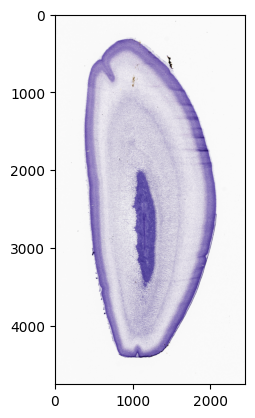

In [65]:
plt.imshow(im)

In [66]:
annot_url

'http://api.brain-map.org/api/v2/svg/101892528?downsample=3&groups=31'

In [67]:
req = requests.get(annot_url, timeout=500)

In [68]:
from allen_functions import get_svg_paths_as_shapes

In [69]:
svg_data = req.text

In [70]:
annot357_shapes_unscaled = get_svg_paths_as_shapes(svg_data)
annot357_shapes = get_svg_paths_as_shapes(svg_data,scale=3/2**downsample)

In [71]:
annot357_shapes_unscaled.keys()

dict_keys([10155, 10595, 10596, 10557, 10561, 11580, 12967, 11587, 11586, 11585, 11583, 10542, 10536, 10529, 10522, 10515, 11716, 11664, 11661, 11658, 11652, 10508, 11630, 11612, 11611, 11610, 11608])

In [72]:
strid =10536 # '10529' #  #'10155'

Note: the svg contains global scaling, but the path extractor needs explicit argument to indicate scale (=3/2^downsample), without which the shape won't overlay properly on the image

In [74]:
from nb_functions import display_shape

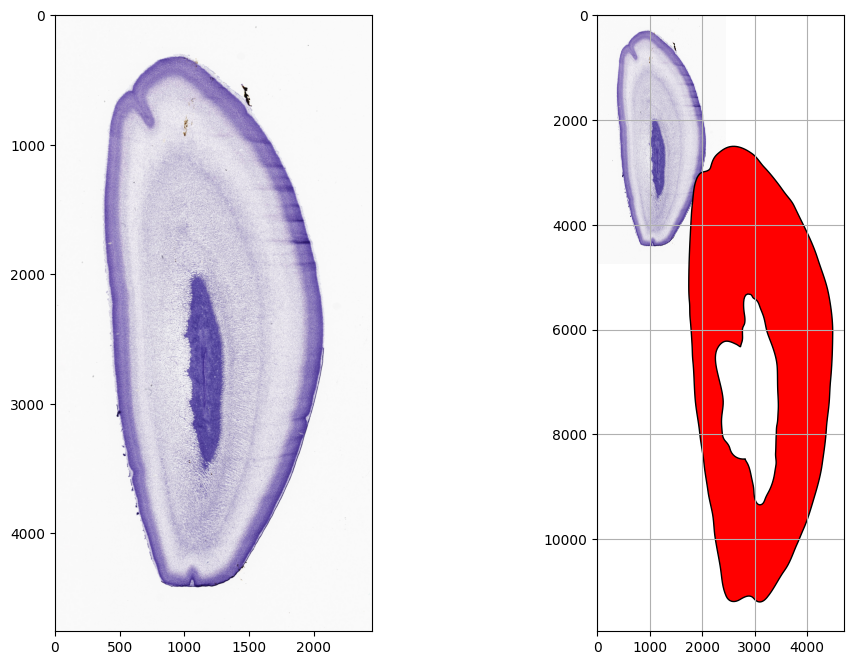

In [76]:
display_shape(im, annot357_shapes_unscaled[strid][0],'r')

Unscaled annotation does not overlay correctly.

Now to try the scaled annotation

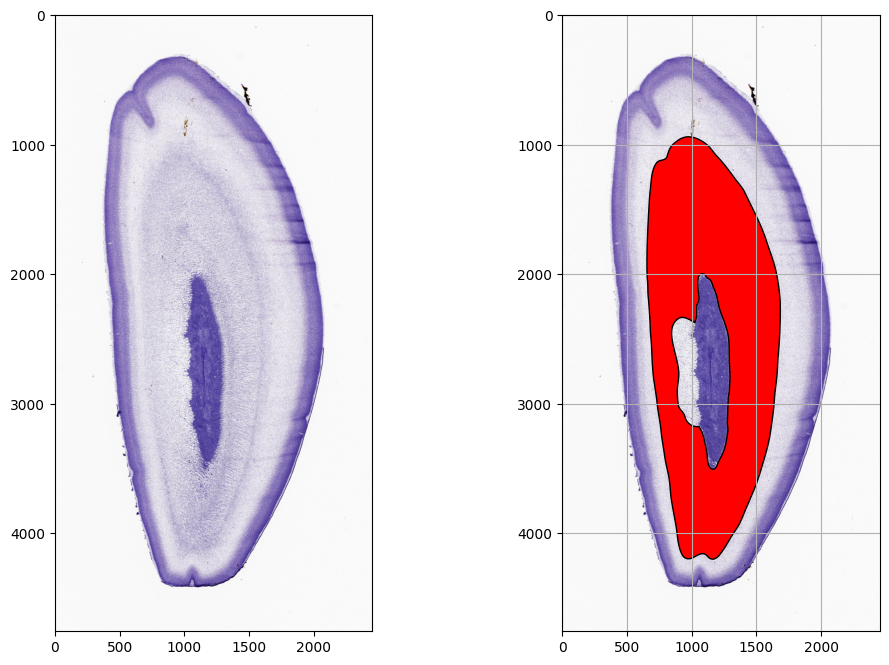

In [77]:
display_shape(im, annot357_shapes[strid][0],'r')